# Линейная регрессия

В этом ноутбуке мы научимся применять модель линейной регрессии для решения задачи регрессии. Мы будем использовать датасет с информацией о пингвинах. 

В первой части ноутбука мы применим линейную регрессию для предсказания длины плавника пингвина по массе его тела. Мы построим линейную регрессию, визуализируем ее решающую поверхность и ошибки модели на элементах датасета.

Во второй части ноутбука мы применим линейную регрессию для предсказания массы тела пингвина по всем его другим характеристикам. 

Начнем с импорта библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка датасета

<img src="https://imgur.com/orZWHly.png" alt="Drawing" style="width: 800px;"/>
source: @allison_horst https://github.com/allisonhorst/penguins

### Загрузка и визуализация данных

Загрузим датасет пингвинов. Ссылка на скачивание датасета: [датасет](https://drive.google.com/file/d/14Emlklqtb74YUPllzwTSTWwcIy8NbQXo/view?usp=sharing)

In [2]:
data = pd.read_csv('penguins.csv')
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Датасет содержит 7 признаков:

- **вид**: вид пингвина. Всего их три разных:	
  - 0: Adelie
  - 1: Chinstrap
  - 2: Gento
- **остров**: oстров, на котором обитает пингвин. Всего их три разных:
  - 0: Biscoe  
  - 1: Dream
  - 2: Torgersen
- **длина клюва**: длина клюва пингвина в миллиметрах;
- **ширина клюва**: ширина клюва пингвина в миллиметрах;
- **длина плавника**: длина плавника пингвина в миллиметрах;
- **масса тела**:	масса тела пингвина в граммах;
- **пол**: пол пингвина. Всго их два:
  - 0: самка
  - 1: самец





## Задача 1. Предсказание длины плавника по массе тела

Создадим новый датафрейм, в котором будет две колонки из данных: масса тела и длина плавника. Разобьем его на две переменные X и y. Мы будем решать задачу предсказания длины плавника пингвина по массе его тела, поэтому признаком Х будет масса тела, а признаком y — длина плавника.

In [3]:
X = data[['масса тела']]
y = data['длина плавника']

Разобьем выборку на тренировочную и тестовую:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Визуализируем данные на плоскости:

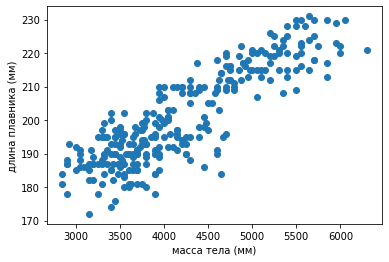

In [6]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('масса тела (мм)');
plt.ylabel('длина плавника (мм)');

plt.show()

Обучим модель линейной регрессии. Модель будет учиться предсказывать величину y (длину плавника) по величине X (массе тела).

Мы будем использовать линейную регрессию из библиотеки sklearn. Вот ссылка на ее докумнтацию: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# заводим модель линейной регрессии
lr = LinearRegression()

# обучим линейную регрессию
lr.fit(X_train, y_train)

LinearRegression()

Выведем значения коэффициентов линейной регрессии. 
- lr.coef_ — коэффициент, соответствующий признаку X ($k_1$), 
- lr.intercept_ — свободный член ($k_0$).

In [9]:
lr.coef_, lr.intercept_

(array([0.01499627]), 137.85533817843935)

Визуализируем данные и прямую, которую выражает модель. 

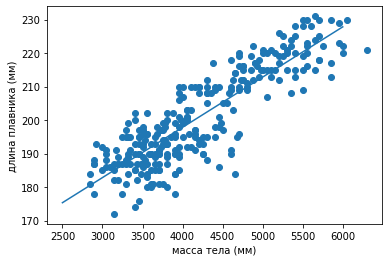

In [10]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# визуализируем прямую, которую выражает линейная регрессия
# y = k_1*x_1 + k_0
def f_line(x):
  return  lr.coef_*x + lr.intercept_

x = [2500, 6000]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Теперь визуализируем точки тестовой выборки и прямую, которую выражает модель:

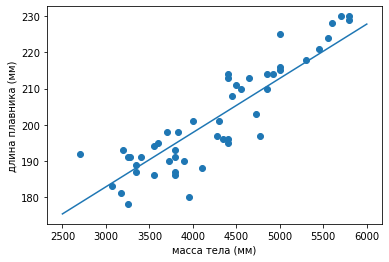

In [11]:
# визуализируем точки тестовой выборки
plt.scatter(X_test, y_test)

# визуализируем прямую, которую выражает линейная регрессия
def f_line(x):
  return  lr.coef_*x + lr.intercept_

x_line = np.linspace(2500, 6000, 100)
y_line = f_line(x_line)
plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Получим предсказания линейной регрессии на тренировочной и тестовой выборках:

In [12]:
# предсказание линейной регрессии для элементов тренировочной выборки
y_train_predicted = lr.predict(X_train)
# предсказание линейной регрессии для элементов тестовой выборки
y_test_predicted = lr.predict(X_test)

In [13]:
np.array(y_test)

array([210., 188., 187., 230., 187., 195., 181., 213., 189., 211., 190.,
       214., 178., 191., 216., 213., 195., 214., 191., 218., 210., 183.,
       214., 198., 225., 194., 203., 201., 186., 230., 192., 201., 180.,
       229., 198., 197., 190., 224., 191., 191., 193., 196., 196., 215.,
       197., 193., 186., 228., 221., 208.])

In [14]:
np.array(y_test_predicted)

array([206.08836137, 199.34004039, 194.84115974, 223.33407053,
       188.09283877, 203.83892104, 185.46849172, 203.83892104,
       188.09283877, 205.33854793, 193.71643958, 210.58724202,
       186.59321189, 188.84265221, 212.83668234, 207.58798825,
       191.84190598, 211.71196218, 186.96811861, 217.33556299,
       210.58724202, 183.96886484, 203.83892104, 195.21606647,
       212.83668234, 191.09209254, 208.71270841, 197.84041351,
       194.84115974, 224.83369741, 178.34526403, 202.33929416,
       197.09060007, 224.83369741, 193.34153286, 209.46252186,
       196.34078663, 221.0846302 , 186.59321189, 194.84115974,
       185.84339844, 203.83892104, 203.0891076 , 212.83668234,
       201.96438744, 194.84115974, 191.09209254, 221.83444364,
       219.58500332, 204.58873449])

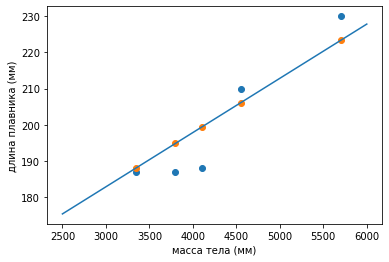

In [15]:
# визуализируем точки тестовой выборки
plt.scatter(X_test[:5], y_test[:5])

# визуализируем предсказания линейной регрессии
plt.scatter(X_test[:5], y_test_predicted[:5])

# визуализируем прямую, которую выражает линейная регрессия
def f_line(x):
  return  lr.coef_*x + lr.intercept_

x_line = np.linspace(2500, 6000, 100)
y_line = f_line(x_line)
plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Посчитаем метрики качества MAE и MSE для тренировочной и тестовой выборок. Мы будем использовать для этого функции из sklearn.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(5.619691985002206, 5.339035656584802)

In [18]:
np.mean(np.abs(y_train_predicted - y_train))

5.619691985002206

In [19]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(47.47941814232244, 41.760549305795955)

In [20]:
np.mean((y_train_predicted - y_train)**2)

47.47941814232244

## Задача 2. Предсказание длины плавника по массе тела и длине клюва

Посмотрим снова на наши данные:

In [ ]:
data.head()

Запишем в переменную Х признаки, по которым мы будем предсказывать ответ ('масса тела', 'длина клюва'), а в переменную y — целевую переменную ('длина плавника'):

In [ ]:
X = data[['масса тела', 'длина клюва']]
y = data['длина плавника']

Также поделим данные на тренировочную и тестовую выборки:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Визуализируем данные в виде точек в трехмерном пространстве. По оси ОХ отложим значение признака "масса тела", по оси OY — значение признака "длина клюва", по оси OZ — ответ, т.е. значение переменной "длина плавника".

In [ ]:
%matplotlib inline

# если вы работаете не в google colab, а в jupyter notebook локально,
# замените строчку выше на эту:
# %matplotlib notebook
# тогда можно будет 3D-график поворачивать и рассматривать с разных сторон

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

# визуализируем точки обучающей выборки
x_points = X_train['масса тела']
y_points = X_train['длина клюва']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

ax.set_xlabel('масса тела');
ax.set_ylabel('длина клюва');
ax.set_zlabel('длина плавника');

plt.show()

Обучим модель линейной регрессии.

Здесь нам уже не нужно делать expand_dims для X_train, потому что он и так двумерный: в нем каждый элемент — это массив значений двух признаков.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

Получим предсказания:

In [ ]:
y_train_predicted = lr.predict(X_train)

y_train_predicted

Теперь визуализируем плоскость, которую задает регрессия. 

Выведем коэффициенты, которые модель поставила в соответствие признакам. 
- coef_ — это коэффициенты $k_1$ и $k_2$, соответствующие двум признакам в нашем датасете ("масса тела" и "длины клюва")
- intercept_ — это ксвободный член, коэффициент $k_0$

In [ ]:
lr.coef_, lr.intercept_

Зададим уравнение плоскости, которую задает линейная регрессия:
$$y = k_1 \cdot (масса \ тела) + k_2 \cdot (длина \ клюва) + k_0$$

In [ ]:
def f_plane(x1, x2):
    return lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_

# то же самое можно было записать в виде lambda-функции:
# f_plane = lambda x1, x2: lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_

Визуализируем плоскость, точки выборки и ответы линейной регрессии на точки выборки:

In [ ]:
X_train['длина клюва'].min(), X_train['длина клюва'].max()

In [ ]:
%matplotlib inline

# если вы работаете не в google colab, а в jupyter notebook локально,
# замените строчку выше на эту:
# %matplotlib notebook
# тогда можно будет 3D-график поворачивать и рассматривать с разных сторон

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

# визуализируем точки обучающей выборки
x_points = X_train['масса тела']
y_points = X_train['длина клюва']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

# визуализируем плоскость
x, y = np.meshgrid(range(2800, 6350), range(30, 61));
z = np.array([f_plane(point_x, point_y) for point_x, point_y in zip(x, y)]);
ax.plot_surface(x, y, z, alpha=0.2);

# раскомментируйте строчку ниже, чтобы визуализировать
# ответы линейной регрессии на плоскости
# ax.scatter(x_points, y_points, y_train_predicted, c='r');


ax.set_xlabel('масса тела');
ax.set_ylabel('длина клюва');
ax.set_zlabel('длина плавника');

plt.show()

Видим, что линейная регрессия неплохо описывает наши точки!

## Задача 3. Предсказание массы тела по всем остальным признакам

Наконец, давайте решим более сложную задачу: предсказние массы тела пингвина по остальным пяти его признакам из датасета.

In [21]:
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Разделим данные на признаки и целевую переменную:

In [22]:
X = data.drop(columns=['масса тела'])
y = data['масса тела']

In [23]:
X.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,пол
0,0,2,39.1,18.7,181.0,1
1,0,2,39.5,17.4,186.0,0
2,0,2,40.3,18.0,195.0,0
3,0,2,36.7,19.3,193.0,0
4,0,2,39.3,20.6,190.0,1


Поделим данные на train и test:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Обучим линейную регрессию на тренировочной части:

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

Получим предсказания линейной регрессии на тренировочной и тестовой частях датасета:

In [27]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

Посчитаем MAE и MSE

In [28]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(256.1488692352941, 313.237345728802)

In [29]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(99417.8916999486, 146062.61649191263)

### Оценка важности признаков линейной регрессии

Давайте еще раз посмотрим на наши признаки и на коэффициенты, которые линейная регрессия поставила в соответствие каждому из них:

In [30]:
X_train.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,пол
297,2,0,50.8,17.3,228.0,1
145,0,1,41.5,18.5,201.0,1
93,0,1,43.2,18.5,192.0,1
208,1,1,45.7,17.0,195.0,0
263,2,0,46.6,14.2,210.0,0


In [31]:
lr.coef_, lr.intercept_

(array([302.96589731, -75.65886968, -22.70811607, -11.30940009,
         30.79674976, 575.09241994]), -1290.6942080078306)

In [32]:
for i, feature in enumerate(X_train.columns):
    print(feature, ' '*(19-len(feature)), '|  ', 'k_'+str(i+1), '  |  ', lr.coef_[i])


вид                  |   k_1   |   302.9658973057419
остров               |   k_2   |   -75.65886967915132
длина клюва          |   k_3   |   -22.708116068792698
ширина клюва         |   k_4   |   -11.309400088600048
длина плавника       |   k_5   |   30.796749759432252
пол                  |   k_6   |   575.0924199366947


Модули значений коэффициентов линейной регрессии отражают важности признаков. т.е. насколько важную роль признак играет в получении ответа моделью линейной регрессии.

Однако нельзя считать, что чем больше модуль коэффициента при признаке, тем больше его важность. Вот почему:

Уравнение линейной регрессии в данном случае имеет вид:

$$ y = k_5x_5 + k_4x_4 + k_3x_3 + k_2x_2 + k_1x_1 + k_0$$

Посмотрим на признаки "вид" ($k_1$) и "длина плавника" ($k_5$) и на коэффициенты, которые им соответствуют. 

Может показаться, что, раз коэффицент для признака $k_1$ больше по модулю, чем для признака $k_5$, то признак $k_1$ играет бОльшую роль в предсказании массы тела, чем признак $k_5$. Однако это не так. Посмотрим на то, а каких границах варьируются значения признаков $k_1$ и $k_5$:
- у $k_1$ всего 3 варианта значения: 0, 1 и 2. Поэтому значение $k_1x_1$ будет варьироваться от 0 до примерно 300-600
- у $k_5$ много вариантов значений, но все они лежат в диапазоне [174, 230]. Поэтому значение $k_5x_5$ будет лежать в диапазоне $\sim $ [6500, 900]

Получается, для любого элемента датасета значение $k_5x_5$ больше, чем $k_1x_1$. Более того, изменение значения признака $k_1$ меняет значение $k_1x_1$ где-то на 250, а изменение значения признака $k_5$ может менять значение $k_5x_5$ на 1000 или больше. 

Получается, величина $k_5x_5$ может сильнее изменять ответ, чем величина $k_1x_1$ и значение признака $k_5$ сильнее влияет на итоговый ответ, чем значение признака $k_1$. 

Иными словами, масса тела пингвина сильнее связана с длиной плавника пингвина, чем с видом пингвина.

In [34]:
X_train['длина плавника'].min(), X_train['длина плавника'].max()

(172.0, 230.0)

### Сравнение линейной регрессии и KNN

В заключение давайте сравним качества моделей линейной регрессии и алгоритма k ближайших соседей на нашей задаче предсказания массы тела пингвина по другим его характеристикам.

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn = KNeighborsRegressor(n_neighbors=5)

In [37]:
knn.fit(X_train, y_train)
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [38]:
y_train_predicted_lr = lr.predict(X_train)
y_test_predicted_lr = lr.predict(X_test)

MAE и MSE на train выборке для KNN:

In [39]:
mean_absolute_error(y_train_predicted_knn, y_train), mean_squared_error(y_train_predicted_knn, y_train)

(214.1696113074205, 74243.28621908127)

MAE на и MSE train выборке для LR:

In [40]:
mean_absolute_error(y_train_predicted_lr, y_train), mean_squared_error(y_train_predicted_lr, y_train)

(256.1488692352941, 99417.8916999486)

MAE и MSE на test выборке для KNN:

In [41]:
mean_absolute_error(y_test_predicted_knn, y_test), mean_squared_error(y_test_predicted_knn, y_test)

(298.9, 148610.5)

MAE и MSE на test выборке для LR:

In [42]:
mean_absolute_error(y_test_predicted_lr, y_test), mean_squared_error(y_test_predicted_lr, y_test)

(313.237345728802, 146062.61649191263)

Видим, что результаты работы алгоритмов разные, но отличаются не сильно. О том, как при решении задачи выбрать лучшую модель, вы узнаете на следующих занятиях.